# CRIM Intervals:  Modules

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  
    * **`piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`**

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called **`Music_Files`**.  Upload the file here, then provide the path to that file: 
    * **`piece = importScore('Music_Files/My_File_Name.mei')`**.  

#### Save outputs as CSV or Excel

* The Jupyter Hub version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 
    * **`notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`**.
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:
    * **`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`**
* Now convert your dataframe to Excel
    * **`frame_name.to_excel(writer, sheet_name='Sheet1')`**
* And finally save the new file to the folder here in the Notebook:
    * **`writer.save()`**

Put the following code to a new cell and update the frame_name and file_name:

`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')` <br>
`frame_name.to_excel(writer, sheet_name='Sheet1')` <br>
`writer.save()` <br>


## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt 
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")

saved_csv folder already exists.


## B. Importing a Piece

### B.1 Import a Piece and Check Title

In [2]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'

# Add your filename here

mei_file = 'CRIM_Model_0050.mei'

url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)

Successfully imported https://crimproject.org/mei/CRIM_Model_0050.mei
{'title': 'Domine Dominus noster', 'composer': 'Roland de  Lassus'}



## C.  Contrapuntal Modules

* A **contrapuntal module** (as formulated by our colleagues Julie Cumming and Peter Schubert) is a kind **nGram** that describes the movement of any two voices:  a succession of **harmonic** intervals separated by the **melodic motion of the lower (tenor) voice**.
<br>

* In simplest form, these would be 5-Grams, as shown below, but we can search for **modules** of any length.

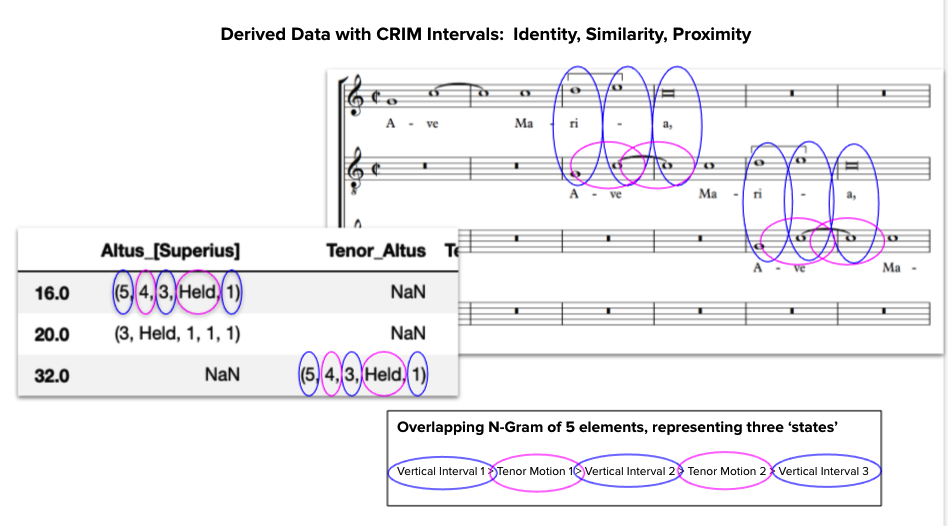

### C.1 Find Contrapuntal Modules

* By default, `piece.ngrams()` will find ngrams of 5 units:  three harmonic events surrounding two melodic ones in the lower voice of each pair.
* But there are many other paramaters to adjust:

- To set length as 5:  `piece.ngrams(n=5)`
- To adjust interval type (d, c, z, or q): `piece.ngrams(interval_settings='d')` 
- To determine the 'endpoint' of the offset reference (start or end of the ngram): `piece.ngrams(offsets=
first)` or `piece.ngrams(offsets=last)`

* Other advanced settings are noted in the documentation

In [15]:
piece.ngrams()

,Bassus_Quinta,Bassus_Tenor,Bassus_Altus,Bassus_Sexta,Bassus_Cantus,Quinta_Tenor,Quinta_Altus,Quinta_Sexta,Quinta_Cantus,Tenor_Altus,Tenor_Sexta,Tenor_Cantus,Altus_Sexta,Altus_Cantus,Sexta_Cantus
0.0,"3_-4, 5_1, 5","5_-4, 8_1, 8","8_-4, 10_1, 10","8_-4, 12_1, 12","12_-4, 15_1, 15","3_-2, 4_1, 4","6_-2, 6_1, 6","6_-2, 8_1, 8","10_-2, 11_1, 11","4_1, 3_1, 3","4_1, 5_1, 5","8_1, 8_1, 8","1_-2, 3_1, 3","5_-2, 6_1, 6","5_2, 4_1, 4"
2.0,"5_1, 5_-5, 8","8_1, 8_-5, 12","10_1, 10_-5, 15","12_1, 12_-5, 19","15_1, 15_-5, 17","4_1, 4_-2, 5","6_1, 6_-2, 8","8_1, 8_-2, 12","11_1, 11_-2, 10","3_1, 3_1, 4","5_1, 5_1, 8","8_1, 8_1, 6","3_1, 3_2, 5","6_1, 6_2, 3","4_1, 4_4, -3"
3.0,"5_-5, 8_4, 5","8_-5, 12_4, 8","10_-5, 15_4, 10","12_-5, 19_4, 12","15_-5, 17_4, 15","4_-2, 5_1, 4","6_-2, 8_1, 6","8_-2, 12_1, 8","11_-2, 10_1, 11","3_1, 4_-2, 3","5_1, 8_-2, 5","8_1, 6_-2, 8","3_2, 5_-3, 3","6_2, 3_-3, 6","4_4, -3_-5, 4"
4.0,"8_4, 5_1, 5","12_4, 8_1, 8","15_4, 10_1, 10","19_4, 12_1, 12","17_4, 15_1, 15","5_1, 4_1, 4","8_1, 6_1, 6","12_1, 8_1, 8","10_1, 11_1, 11","4_-2, 3_1, 3","8_-2, 5_1, 5","6_-2, 8_1, 8","5_-3, 3_1, 3","3_-3, 6_1, 6","-3_-5, 4_1, 4"
6.0,"5_1, 5_-5, 8","8_1, 8_-5, 12","10_1, 10_-5, 15","12_1, 12_-5, 17","15_1, 15_-5, 19","4_1, 4_-2, 5","6_1, 6_-2, 8","8_1, 8_-2, 10","11_1, 11_-2, 12","3_1, 3_1, 4","5_1, 5_1, 6","8_1, 8_1, 8","3_1, 3_2, 3","6_1, 6_2, 5","4_1, 4_2, 3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472.0,"5_-4, 8_5, 5","8_-4, 12_5, 8","10_-4, 15_5, 11","12_-4, 19_5, 12","15_-4, 17_5, 15","4_1, 5_2, 4","6_1, 8_2, 7","8_1, 12_2, 8","11_1, 10_2, 11","3_2, 4_1, 4","5_2, 8_1, 5","8_2, 6_1, 8","3_3, 5_1, 2","6_3, 3_1, 5","4_5, -3_-4, 4"
474.0,"8_5, 5_-5, 8","12_5, 8_-5, 12","15_5, 11_Held, 10","19_5, 12_-5, 17","17_5, 15_-5, 19","5_2, 4_-2, 5","8_2, 7_Held, 6","12_2, 8_-2, 10","10_2, 11_-2, 12","4_1, 4_Held, 3","8_1, 5_1, 6","6_1, 8_1, 8","5_1, 2_-2, 3","3_1, 5_-2, 6","-3_-4, 4_2, 3"
476.0,NaN,NaN,"11_Held, 10_Held, 9",NaN,NaN,NaN,"7_Held, 6_Held, 5",NaN,NaN,"4_Held, 3_Held, 2",NaN,NaN,"2_-2, 3_-2, 4","5_-2, 6_-2, 7",NaN
477.0,NaN,NaN,"10_Held, 9_Held, 10",NaN,NaN,NaN,"6_Held, 5_Held, 6",NaN,NaN,"3_Held, 2_Held, 3",NaN,NaN,"3_-2, 4_2, 3","6_-2, 7_2, 6",NaN


### NGrams with Various Options

- Chromatic (or Quality), etc
- No Unisons
- Various lengths
- Exclude rests

In [25]:
mel = piece.melodic(kind="c")
har = piece.harmonic(kind="c")
ngrams = piece.ngrams(df=har, other=mel, n=5)
ngrams.head()

,Bassus_Quinta,Bassus_Tenor,Bassus_Altus,Bassus_Sexta,Bassus_Cantus,Quinta_Tenor,Quinta_Altus,Quinta_Sexta,Quinta_Cantus,Tenor_Altus,Tenor_Sexta,Tenor_Cantus,Altus_Sexta,Altus_Cantus,Sexta_Cantus
0.0,"3_-5, 7_0, 7_-7, 12_5, 7","7_-5, 12_0, 12_-7, 19_5, 12","12_-5, 16_0, 16_-7, 24_5, 16","12_-5, 19_0, 19_-7, 31_5, 19","19_-5, 24_0, 24_-7, 28_5, 24","4_-1, 5_0, 5_-2, 7_0, 5","9_-1, 9_0, 9_-2, 12_0, 9","9_-1, 12_0, 12_-2, 19_0, 12","16_-1, 17_0, 17_-2, 16_0, 17","5_0, 4_0, 4_0, 5_-2, 4","5_0, 7_0, 7_0, 12_-2, 7","12_0, 12_0, 12_0, 9_-2, 12","0_-1, 3_0, 3_1, 7_-3, 3","7_-1, 8_0, 8_1, 4_-3, 8","7_2, 5_0, 5_5, -3_-7, 5"
2.0,"7_0, 7_-7, 12_5, 7_0, 7","12_0, 12_-7, 19_5, 12_0, 12","16_0, 16_-7, 24_5, 16_0, 16","19_0, 19_-7, 31_5, 19_0, 19","24_0, 24_-7, 28_5, 24_0, 24","5_0, 5_-2, 7_0, 5_0, 5","9_0, 9_-2, 12_0, 9_0, 9","12_0, 12_-2, 19_0, 12_0, 12","17_0, 17_-2, 16_0, 17_0, 17","4_0, 4_0, 5_-2, 4_0, 4","7_0, 7_0, 12_-2, 7_0, 7","12_0, 12_0, 9_-2, 12_0, 12","3_0, 3_1, 7_-3, 3_0, 3","8_0, 8_1, 4_-3, 8_0, 8","5_0, 5_5, -3_-7, 5_0, 5"
3.0,"7_-7, 12_5, 7_0, 7_-7, 12","12_-7, 19_5, 12_0, 12_-7, 19","16_-7, 24_5, 16_0, 16_-7, 24","19_-7, 31_5, 19_0, 19_-7, 28","24_-7, 28_5, 24_0, 24_-7, 31","5_-2, 7_0, 5_0, 5_-2, 7","9_-2, 12_0, 9_0, 9_-2, 12","12_-2, 19_0, 12_0, 12_-2, 16","17_-2, 16_0, 17_0, 17_-2, 19","4_0, 5_-2, 4_0, 4_0, 5","7_0, 12_-2, 7_0, 7_0, 9","12_0, 9_-2, 12_0, 12_0, 12","3_1, 7_-3, 3_0, 3_1, 4","8_1, 4_-3, 8_0, 8_1, 7","5_5, -3_-7, 5_0, 5_2, 3"
4.0,"12_5, 7_0, 7_-7, 12_5, 7","19_5, 12_0, 12_-7, 19_5, 12","24_5, 16_0, 16_-7, 24_5, 19","31_5, 19_0, 19_-7, 28_5, 24","28_5, 24_0, 24_-7, 31_5, 28","7_0, 5_0, 5_-2, 7_0, 5","12_0, 9_0, 9_-2, 12_0, 12","19_0, 12_0, 12_-2, 16_0, 17","16_0, 17_0, 17_-2, 19_0, 21","5_-2, 4_0, 4_0, 5_-2, 7","12_-2, 7_0, 7_0, 9_-2, 12","9_-2, 12_0, 12_0, 12_-2, 16","7_-3, 3_0, 3_1, 4_0, 5","4_-3, 8_0, 8_1, 7_0, 9","-3_-7, 5_0, 5_2, 3_1, 4"
6.0,NaN,NaN,NaN,NaN,NaN,"5_0, 5_-2, 7_0, 5_-2, 12","9_0, 9_-2, 12_0, 12_-2, 16","12_0, 12_-2, 16_0, 17_-2, 19",NaN,"4_0, 4_0, 5_-2, 7_5, 4","7_0, 7_0, 9_-2, 12_5, 7",NaN,"3_0, 3_1, 4_0, 5_2, 3",NaN,NaN


In [26]:
nr_no_unisons = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr_no_unisons, kind="c")
har = piece.harmonic(kind="c", compound=False)
ngrams = piece.ngrams(df=har, other=mel)
ngrams.head()

,Bassus_Quinta,Bassus_Tenor,Bassus_Altus,Bassus_Sexta,Bassus_Cantus,Quinta_Tenor,Quinta_Altus,Quinta_Sexta,Quinta_Cantus,Tenor_Altus,Tenor_Sexta,Tenor_Cantus,Altus_Sexta,Altus_Cantus,Sexta_Cantus
3.0,"7_-7, 0_5, 7","0_-7, 7_5, 0","4_-7, 0_5, 4","7_-7, 7_5, 7","0_-7, 4_5, 0","5_-2, 7_Held, 5","9_-2, 0_Held, 9","0_-2, 7_Held, 0","5_-2, 4_Held, 5","4_Held, 5_-2, 4","7_Held, 0_-2, 7","0_Held, 9_-2, 0","3_1, 7_-3, 3","8_1, 4_-3, 8","5_5, 9_-7, 5"
7.0,"7_-7, 0_5, 7","0_-7, 7_5, 0","4_-7, 0_5, 7","7_-7, 4_5, 0","0_-7, 7_5, 4","5_-2, 7_Held, 5","9_-2, 0_Held, 0","0_-2, 4_Held, 5","5_-2, 7_Held, 9","4_Held, 5_-2, 7","7_Held, 9_-2, 0","0_Held, 0_-2, 4","3_1, 4_Held, 5","8_1, 7_Held, 9","5_2, 3_1, 4"
8.0,NaN,NaN,NaN,NaN,NaN,"7_Held, 5_-2, 0","0_Held, 0_-2, 4","4_Held, 5_-2, 7",NaN,"5_-2, 7_5, 4","9_-2, 0_5, 7",NaN,"4_Held, 5_2, 3",NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,"5_-2, 0_7, 4","0_-2, 4_7, 7","5_-2, 7_7, 0",NaN,"7_5, 4_-1, 3","0_5, 7_-1, 8",NaN,"5_2, 3_-2, 5",NaN,NaN
15.0,NaN,NaN,NaN,NaN,NaN,"4_Held, 7_-3, 0","7_Held, 0_-3, 3","0_Held, 4_-3, 7",NaN,"3_3, 5_2, 3","8_3, 9_2, 7",NaN,"5_5, 4_Held, 4",NaN,NaN


In [27]:
ngrams = piece.ngrams(exclude=['Rest']).fillna('-')
ngrams.head()

,Bassus_Quinta,Bassus_Tenor,Bassus_Altus,Bassus_Sexta,Bassus_Cantus,Quinta_Tenor,Quinta_Altus,Quinta_Sexta,Quinta_Cantus,Tenor_Altus,Tenor_Sexta,Tenor_Cantus,Altus_Sexta,Altus_Cantus,Sexta_Cantus
0.0,"3_-4, 5_1, 5","5_-4, 8_1, 8","8_-4, 10_1, 10","8_-4, 12_1, 12","12_-4, 15_1, 15","3_-2, 4_1, 4","6_-2, 6_1, 6","6_-2, 8_1, 8","10_-2, 11_1, 11","4_1, 3_1, 3","4_1, 5_1, 5","8_1, 8_1, 8","1_-2, 3_1, 3","5_-2, 6_1, 6","5_2, 4_1, 4"
2.0,"5_1, 5_-5, 8","8_1, 8_-5, 12","10_1, 10_-5, 15","12_1, 12_-5, 19","15_1, 15_-5, 17","4_1, 4_-2, 5","6_1, 6_-2, 8","8_1, 8_-2, 12","11_1, 11_-2, 10","3_1, 3_1, 4","5_1, 5_1, 8","8_1, 8_1, 6","3_1, 3_2, 5","6_1, 6_2, 3","4_1, 4_4, -3"
3.0,"5_-5, 8_4, 5","8_-5, 12_4, 8","10_-5, 15_4, 10","12_-5, 19_4, 12","15_-5, 17_4, 15","4_-2, 5_1, 4","6_-2, 8_1, 6","8_-2, 12_1, 8","11_-2, 10_1, 11","3_1, 4_-2, 3","5_1, 8_-2, 5","8_1, 6_-2, 8","3_2, 5_-3, 3","6_2, 3_-3, 6","4_4, -3_-5, 4"
4.0,"8_4, 5_1, 5","12_4, 8_1, 8","15_4, 10_1, 10","19_4, 12_1, 12","17_4, 15_1, 15","5_1, 4_1, 4","8_1, 6_1, 6","12_1, 8_1, 8","10_1, 11_1, 11","4_-2, 3_1, 3","8_-2, 5_1, 5","6_-2, 8_1, 8","5_-3, 3_1, 3","3_-3, 6_1, 6","-3_-5, 4_1, 4"
6.0,"5_1, 5_-5, 8","8_1, 8_-5, 12","10_1, 10_-5, 15","12_1, 12_-5, 17","15_1, 15_-5, 19","4_1, 4_-2, 5","6_1, 6_-2, 8","8_1, 8_-2, 10","11_1, 11_-2, 12","3_1, 3_1, 4","5_1, 5_1, 6","8_1, 8_1, 8","3_1, 3_2, 3","6_1, 6_2, 5","4_1, 4_2, 3"


### C.2 Count Contrapuntal Modules

* how many of each `nGram` in this piece?
* variables for `kind`, `compound` `length`
* it is also possible exclude nGrams with **rests**, as shown here.

In [52]:

piece.ngrams(exclude=['Rest']).stack().value_counts().to_frame()

,0
"3_2, 3_2, 3",16
"4_-2, 5_-2, 6",12
"5_2, 4_2, 3",12
"6_-2, 7_-2, 8",12
"3_-2, 4_-2, 5",12
...,...
"1_-2, 3_2, 3",1
"5_Held, 10_2, 9",1
"5_-5, 10_Held, 12",1
"5_2, 3_-2, 3",1


### C.3  Search for Modules

It's possible to search for any module, but cadences are quite formulaic, and thus are especially discoverable with this method.  Here are a few of the typical combinations expressed as modules.  Copy and paste some of these into the interactive search below to see where they occur in your piece.

* Authentic/Phrygian cadence with suspension in **diatonic**: `7_Held, 6_-2, 8` or `2_-3, 3_2, 1`

* Authentic cadence with suspension in **chromatic**: `10_Held, 9_-2, 12`

* Authentic cadence with suspension in **with quality**:`m7_Held, M6_-2, P8`

* Phrygian cadence with suspension in **chromatic**: `11_Held, 9_-2, 12`

* Phrygian cadence with suspension in **with quality**: `M7_Held, M6_-2, P8`

* Plagal cadence (no suspension) is often **diatonic**:  `6_-2, 6_-2, 6` at same time we hear `5_2,-4, 5`

In [31]:
@interact
def get_modules(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[3, 4, 5, 6], endpoint=["last", "first"]):
    
    piece_mel = piece.melodic(kind=kind)
    piece_har = piece.harmonic(kind=kind, compound=compound)
    ngrams = piece.ngrams(df=piece_har, other=piece_mel)
    filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)]#.copy()
    beats_measures_mod = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mod.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")



interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

In [30]:
search_pattern = "7"
piece_mel = piece.melodic(kind="d")
piece_har = piece.harmonic(kind="d", compound=False)
ngrams = piece.ngrams(df=piece_har, other=piece_mel)
filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)]#.copy()
beats_measures_mod = piece.detailIndex(filtered_ngrams, offset=True)

beats_measures_mod

Bassus_Quinta       Bassus_Tenor       Bassus_Altus  \
Measure Beat  Offset                                                            
5       1.000 32.00        5_-4, 8_5, 5       8_-4, 5_5, 8       3_-4, 8_5, 4   
        2.000 34.00        8_5, 5_-5, 8       5_5, 8_-5, 5     8_5, 4_Held, 3   
        3.000 36.00        5_-5, 8_4, 3       8_-5, 5_4, 5  4_Held, 3_Held, 2   
        3.500 37.00                 NaN                NaN  3_Held, 2_Held, 3   
        3.750 37.50                 NaN                NaN    2_Held, 3_-5, 8   
15      2.000 114.00                NaN                NaN                NaN   
        2.500 115.00                NaN                NaN                NaN   
        3.000 116.00                NaN                NaN                NaN   
        3.750 117.50                NaN                NaN                NaN   
        3.875 117.75                NaN                NaN                NaN   
20      1.000 152.00  4_Held, 3_Held, 2  6_Held, 5_Held, 4                NaN   
        1.500 153.00  3_Held, 2_Held, 3  5_Held, 4_Held, 5                NaN   
        1.750 153.50    2_Held, 3_-5, 8    4_Held, 5_-5, 5                NaN   
42      1.000 328.00                NaN                NaN                NaN   
        1.500 329.00                NaN                NaN                NaN   
        1.750 329.50                NaN                NaN                NaN   
48      1.500 377.00       3_1, 3_-4, 5       5_1, 5_-4, 8       8_1, 8_-4, 5   
        2.000 378.00       3_-4, 5_4, 1       5_-4, 8_4, 5       8_-4, 5_4, 3   
        3.000 380.00                NaN                NaN                NaN   
52      3.500 413.00                NaN                NaN                NaN   
        4.000 414.00                NaN                NaN                NaN   
53      1.000 416.00                NaN                NaN                NaN   
58      1.000 456.00       5_-4, 8_5, 5       8_-4, 5_5, 8       3_-4, 8_5, 4   
        2.000 458.00       8_5, 5_-5, 8       5_5, 8_-5, 5     8_5, 4_Held, 3   
        3.000 460.00       5_-5, 8_5, 5       8_-5, 5_5, 8  4_Held, 3_Held, 2   
        3.500 461.00                NaN                NaN  3_Held, 2_Held, 3   
        3.750 461.50                NaN                NaN    2_Held, 3_-5, 8   
60      1.000 472.00       5_-4, 8_5, 5       8_-4, 5_5, 8       3_-4, 8_5, 4   
        2.000 474.00       8_5, 5_-5, 8       5_5, 8_-5, 5     8_5, 4_Held, 3   
        3.000 476.00                NaN                NaN  4_Held, 3_Held, 2   
        3.500 477.00                NaN                NaN  3_Held, 2_Held, 3   
        3.750 477.50                NaN                NaN    2_Held, 3_-5, 8   

                      Bassus_Sexta      Bassus_Cantus       Quinta_Tenor  \
Measure Beat  Offset                                                       
5       1.000 32.00   5_-4, 5_5, 8       8_-4, 3_5, 5        4_1, 5_2, 4   
        2.000 34.00   5_5, 8_-5, 3       3_5, 5_-5, 5       5_2, 4_-2, 5   
        3.000 36.00            NaN                NaN      4_-2, 5_-3, 3   
        3.500 37.00            NaN                NaN                NaN   
        3.750 37.50            NaN                NaN                NaN   
15      2.000 114.00           NaN                NaN       5_-4, 8_5, 5   
        2.500 115.00           NaN                NaN     8_5, 5_Held, 6   
        3.000 116.00           NaN                NaN  5_Held, 6_Held, 7   
        3.750 117.50           NaN                NaN  6_Held, 7_Held, 8   
        3.875 117.75           NaN                NaN    7_Held, 8_-5, 3   
20      1.000 152.00           NaN                NaN      3_-2, 3_-2, 3   
        1.500 153.00           NaN                NaN       3_-2, 3_2, 3   
        1.750 153.50           NaN                NaN        3_2, 3_2, 5   
42      1.000 328.00           NaN                NaN                NaN   
        1.500 329.00           NaN                NaN  

## D. Corpus Inventory

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
* The pieces are provided as a **list**, within square brackets and separated by commas.  
* The bracketed list is then contained within the parentheses of `CorpusBase()`
* For example: `corpus CorpusBase(
       ['https://crimproject.org/mei/CRIM_Mass_0006_1.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_2.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_3.mei'])`
     



In [3]:
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0006_1.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0006_2.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0006_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0006_4.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0006_5.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0007_1.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0007_2.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0007_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0007_4.mei',        
                             'https://crimproject.org/mei/CRIM_Model_0009.mei'])

Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_5.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0007_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0007_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0007_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0007_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Model_0009.mei


#### E.1  Corpus Ngram Inventory

*  Get the `ngrams` for all of them.  
*  In this case:  modules of length "3", with diatonic
*  Then combine them into one frame

* NB: use `ImportedPiece`, not `piece`!
* NB:  for `func` do **NOT** include the closing parentheses!

- func = ImportedPiece.ngrams
- list_of_modules = corpus.batch(func=func, kwargs={'n': 4}, metadata=True)

- `title_of_output = pd.concat(list_of_melodic_ngrams)`



In [11]:
# remember to omit "()" after calling `ngrams`
func = ImportedPiece.ngrams
list_of_modules = corpus.batch(func=func, kwargs={'n': 4}, metadata=True)
func2 = ImportedPiece.detailIndex
list_of_details = corpus.batch(func=func2, kwargs={'offset': False, 'df': list_of_modules})

output = pd.concat(list_of_details).fillna('-').dropna(how="all")

In [40]:
output.to_csv('je_suis_modules.csv')

In [12]:
output

[Bassus]_[Tenor] [Bassus]_[Contratenor]  \
Measure Beat                                                    
1       3.0      1_1, 1_3, -3_Held, -3                      -   
        4.0    1_3, -3_Held, -3_-2, -2                      -   
2       1.0   -3_Held, -3_-2, -2_-2, 3    3_-2, 4_-2, 5_-2, 6   
        2.0      -3_-2, -2_-2, 3_-2, 4                      -   
        2.5       -2_-2, 3_-2, 4_-2, 6    4_-2, 5_-2, 6_-2, 8   
...                                ...                    ...   
30      3.5                          -                      -   
        4.0                          -                      -   
31      1.0                          -                      -   
        1.5                          -                      -   
        2.0                          -                      -   

             [Bassus]_[Superius] [Tenor]_[Contratenor] [Tenor]_[Superius]  \
Measure Beat                                                                
1       3.0                    -                     -                  -   
        4.0                    -                     -                  -   
2       1.0                    -   5_1, 5_3, 3_Held, 3                  -   
        2.0                    -   5_3, 3_Held, 3_2, 3                  -   
        2.5                    -                     -                  -   
...                          ...                   ...                ...   
30      3.5                    -                     -                  -   
        4.0                    -                     -                  -   
31      1.0                    -                     -                  -   
        1.5                    -                     -                  -   
        2.0                    -                     -                  -   

             [Contratenor]_[Superius]       Composer  \
Measure Beat                                           
1       3.0                         -     Jean Guyon   
        4.0                         -     Jean Guyon   
2       1.0                         -     Jean Guyon   
        2.0                         -     Jean Guyon   
        2.5                         -     Jean Guyon   
...                               ...            ...   
30      3.5                         -  Pierre Cadéac   
        4.0                         -  Pierre Cadéac   
31      1.0                         -  Pierre Cadéac   
        1.5                         -  Pierre Cadéac   
        2.0                         -  Pierre Cadéac   

                                        Title [Bassus]_[Tenor 2]  \
Measure Beat                                                       
1       3.0   Missa Je suis déshéritée: Kyrie                  -   
        4.0   Missa Je suis déshéritée: Kyrie                  -   
2       1.0   Missa Je suis déshéritée: Kyrie                  -   
        2.0   Missa Je suis déshéritée: Kyrie                  -   
        2.5   Missa Je suis déshéritée: Kyrie                  -   
...                                       ...                ...   
30      3.5                Je suis déshéritée                  -   
        4.0                Je suis déshéritée                  -   
31      1.0                Je suis déshéritée                  -   
        1.5                Je suis déshéritée                  -   
        2.0                Je suis déshéritée                  -   

             [Bassus]_[Tenor 1]  ... [Tenor 2]_[Contratenor]  \
Measure Beat                     ...                           
1       3.0                   -  ...                       -   
        4.0                   -  ...                       -   
2       1.0                   -  ...                       -   
        2.0                   -  ...                       -   
        2.5                   -  ...                       -   
...                         ...  ...                     ...   
30      3.5                   -  ...            